## Свойства оценок

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as sps
import seaborn as sns
sns.set(font_scale=1.5)

###   1. Несмещенность оценок

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.
Как известно из теории, оценки $\frac{n+1}{n}X_{(n)}, 2\overline{X}$ являются *несмещенными*. В то время как, оценка  $X_{(n)}$ таким ствойством не обладает. Давайте визуализируем данные свойства оценок.

Реализуем выборку из равномерного распределения размером `sample_size`=100.

In [2]:
sample_size = 100
X = sps.uniform.rvs(size=sample_size)

В этом случае мы сгенерировали выборку из распределения $U[0, 1]$.


Реализуйте три функции, каждая из которых на вход берет несколько выборок, а на выход выдает массив оценок  
(первая функция - $X_{(n)}$, вторая функция - $\frac{n+1}{n}X_{(n)}$, третья функция - $2\overline{X}$)  для каждой выборки.

In [3]:
def estimate_X_n(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    return np.max(X, axis = 1)

def estimate_X_n_corrected(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    return (X.shape[1] + 1)/ X.shape[1] * np.max(X, axis = 1)

def estimate_2_mean(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    return 2 * np.mean(X, axis = 1)

Проверим, что ваши функции реализованы корректно (ячейка не должна выдавать ошибок).

In [4]:
X = np.array([[1, 3, 3902, 6], [2, 5, 69751, 89]])


assert(sum(estimate_X_n(X) != np.array(( 3902, 69751))) == 0)
assert(sum(estimate_X_n_corrected(X) != np.array((4877.5 ,87188.75))) == 0)
assert(sum(estimate_2_mean(X) != np.array([ 1956. , 34923.5])) == 0)


Зададим список оценок и разные параметры для отрисовки графика

In [5]:
estimators = [
    (estimate_X_n, r'$X_{(n)}$', 'blue', 0.0),
    (estimate_X_n_corrected, r'$\frac{n+1}{n}X_{(n)}$', 'purple', 0.1),
    (estimate_2_mean, r'$2\overline{X}$', 'green', 0.2)
]

Мы хотим понять, являются ли оценки параметра $\theta$ смещенными, для этого нам нужно провести множество экспериментов (сгенерировать выборку много раз, так как при каждой генерации получаются разные числа).

 Создадим 500 выборок размера `sample_size`.

In [6]:
sample_count = 500
sample_size = 100
X = np.random.uniform(size = (sample_count, sample_size))
X.shape

(500, 100)

Визуализируем полученные оценки на одном графике. Звездочками обозначим средние значения по 500 экспериментам для каждой оценки.

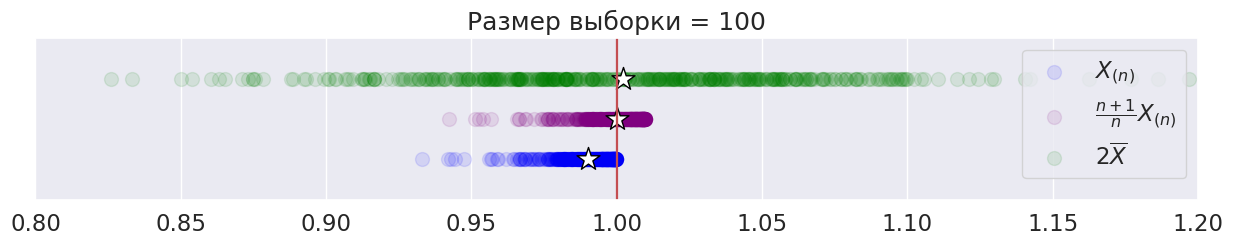

In [7]:
plt.figure(figsize=(15, 0.7*len(estimators)))
for estimator, name, color, y in estimators:
    E = estimator(X)
    plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
    plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((0.8, 1.2))
    plt.ylim((-0.1, 0.1 * len(estimators)))

Напишите функцию построения таких графиков в общем виде: на вход функция может получать любые распределения (`distributions`) и любые оценки (`estimators`).

In [8]:
def est_plot(distribution, estimators, sample_size, sample_count):
    '''
    Построение графика разброса реализаций оценок и их средних значений.

    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''

    plt.figure(figsize=(15, 0.7 * len(estimators)))
    X = np.array([sps.uniform.rvs(size=sample_size) for i in range (sample_count)])

    for estimator, name, color, y in estimators:
        E = np.array(estimator(X))
        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')
        plt.vlines(1, -1, 1, color='r')
        plt.title(f'Размер выборки = {sample_size}')
        plt.yticks([])
        plt.legend()
        plt.xlim(0.8, 1.2)
        plt.ylim((-0.1, 0.1 * len(estimators)))

    plt.show()

Постройте три графика, аналогичных верхнему, для разных размеров выборок (10, 100, 500).


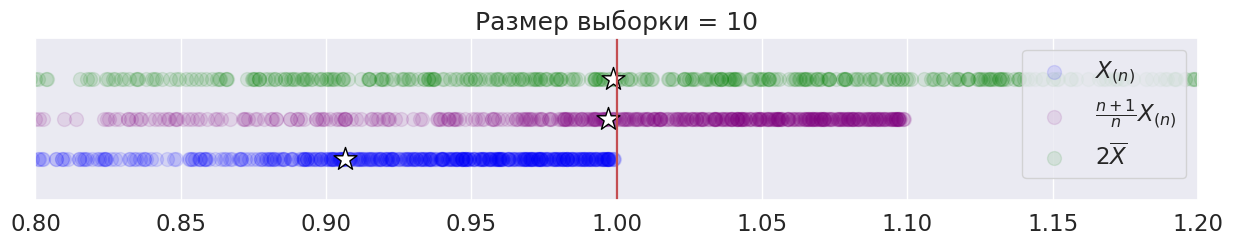

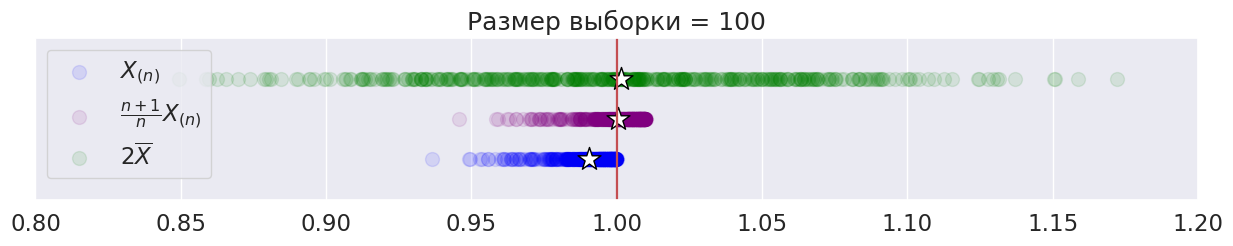

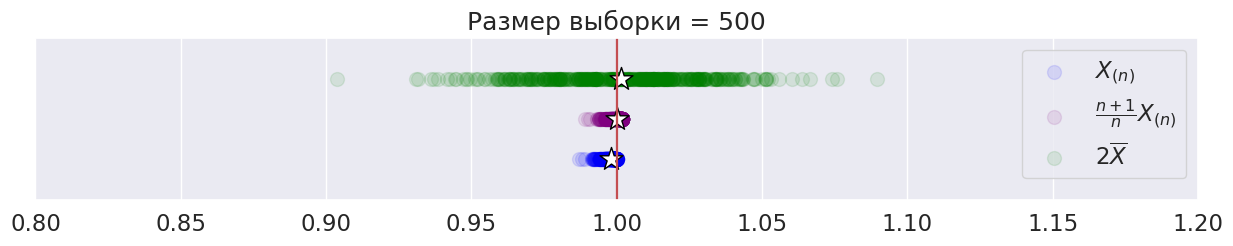

In [9]:
sample_count = 500  # количество экспериментов
sample_size_list = [10, 100, 500] # размеры выборок
distribution = sps.uniform
for sample_size in sample_size_list:
    est_plot(X, estimators, sample_size, sample_count)

**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

In [10]:
def mean_plot(distribution, estimators, n_grid, sample_count):
    '''
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    n_grid -- массив значений размера выборки
    sample_count -- количество генерируемых выборок
    '''

    plt.figure(figsize=(15, 10))

    for estimator, name, color, y in estimators:
        mean = []
        size = []
        for sample_size in range(n_grid):
            X = distribution(size=(sample_size+1, n_grid))
            E = estimator(X[:, :sample_size+1])
            mean.append(np.mean(E))
            size.append(sample_size)
        plt.plot(size, mean, lw=1)
        plt.title('Зависимость среднего от размера выборки')

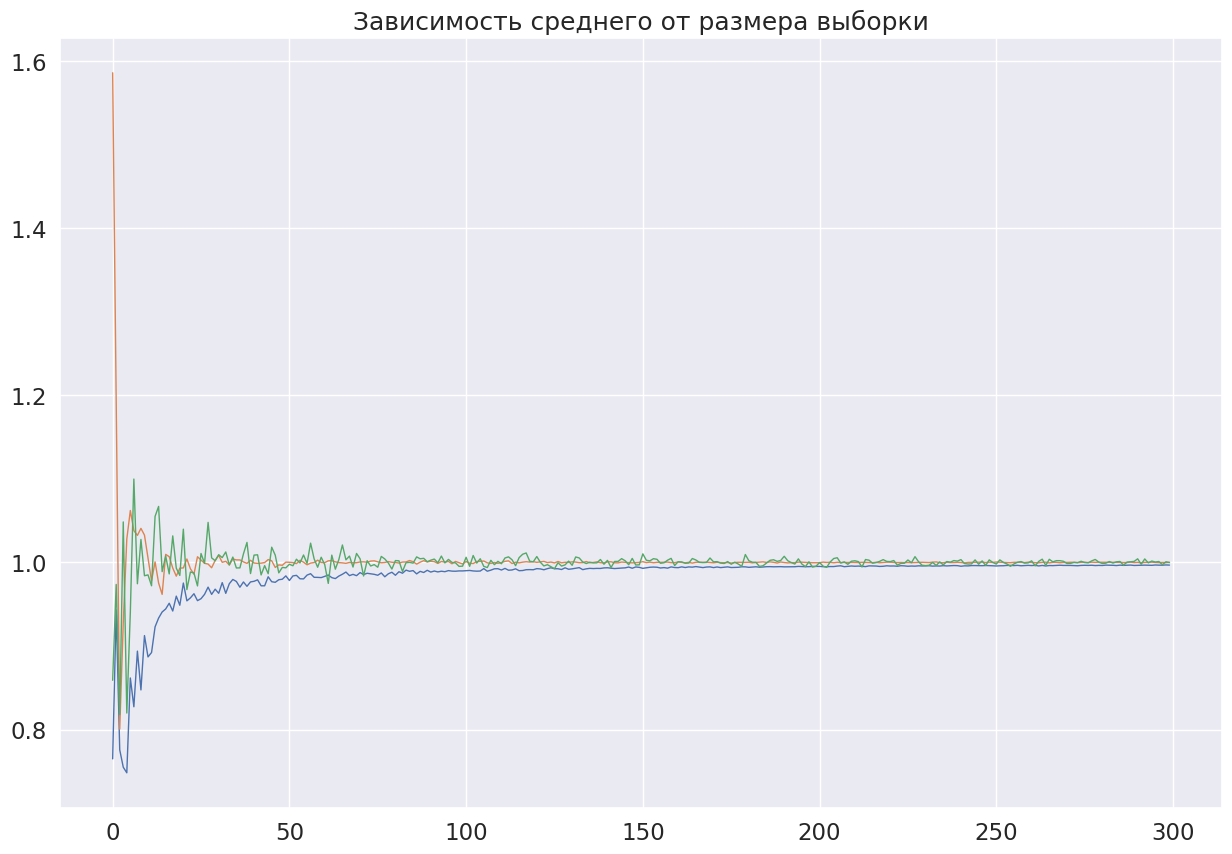

In [12]:
n_grid = 300
mean_plot(sps.uniform.rvs, estimators, n_grid, sample_count)

**Вывод.** Несмещенность &mdash; свойство оценки в среднем быть равной параметру, который она оценивает. Иначе говоря, при бесконечном повторении эксперимента в среднем оценка будет равна истинному значению параметра.
Проведенные эксперименты подтверждают свойство несмещенности &mdash; среднее значение несмещенных оценок $\frac{n}{n-1}X_{(n)}$ и $2\overline{X}$ оказались примерно равны истинному значению параметра в отличии от смещенной оценки $X_{(n)}$. Кроме того, можно заметить, что для смещенной оценки $X_{(n)}$ смещение уменьшается с ростом размера выборки, иначе говоря, она является *асимптотически несмещенной*.

В лабораторных работах скорректированные оценки используют, т.к. число опытов часто мало и $n$ нельзя считать достаточно большим. В таком случае отличие между несмещенными оценками и асимптотически несмещенными оценками становится существенным.